## Cargar Datos

The dataset includes data from **768** women with **8** characteristics, in particular:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)


In [ ]:
# help("teradatasql")

<h3>Coneccion Base de Datos</h3>

In [2]:
from teradataml import create_context
import getpass
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)


#host = input("Host:")
#username = input("Username:")
password = getpass.getpass("Password:")
host = "tdprd.td.teradata.com"
username = "rb255002"
#password = ""

engine = create_context(host=host, username=username, password=password, logmech="TDNEGO")

Password: ··········


In [3]:
from teradataml.dataframe.dataframe import DataFrame
from teradataml.dataframe.copy_to import copy_to_sql
from teradataml.options.display import display
import numpy as np

<h3>Crear Teradata DataFrames</h3>

<i>Insertar Tablas  Usando Frames.</i>

In [39]:
#from aoa import create_features_stats_table
#create_features_stats_table(f"{database}.Taller_Tabla1")

In [4]:
from teradataml import copy_to_sql, DataFrame
from teradatasqlalchemy.types import *
import pandas as pd

database = 'rb255002'

df1 = pd.read_csv("pima_patient_features.csv")
copy_to_sql(df=df1, 
            table_name="taller_pima_patient_features",     
            schema_name=database,
            primary_index="PatientId", 
            if_exists="replace",  
            types={
                "PatientId": INTEGER,
                "NumTimesPrg": INTEGER, 
                "PlGlcConc": INTEGER,
                "BloodP": INTEGER,
                "SkinThick": INTEGER,
                "TwoHourSerIns": INTEGER,
                "BMI": FLOAT,
                "DiPedFunc": FLOAT,
                "Age": INTEGER
            })

df2 = pd.read_csv("pima_patient_diagnoses.csv")
copy_to_sql(df=df2, 
            table_name="taller_pima_patient_diagnoses",     
            schema_name=database,
            primary_index="PatientId", 
            if_exists="replace",  
            types={
                "PatientId": INTEGER,
                "HasDiabetes": INTEGER
            })



In [5]:
database = 'rb255002'

tdf = DataFrame('{database}."taller_pima_patient_features"')

In [6]:
tdf.head()

PatientId,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age
2,8,183,64,0,0,23.3,0.672,32
4,0,137,40,35,168,43.1,2.2880000000000003,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54
7,10,115,0,0,0,35.3,0.134,29
3,1,89,66,23,94,28.1,0.16699999999999998,21
1,1,85,66,29,0,26.6,0.35100000000000003,31
0,6,148,72,35,0,33.6,0.627,50


In [47]:
tdf.head().show_query()

'select "PatientId","NumTimesPrg","PlGlcConc","BloodP","SkinThick","TwoHourSerIns","BMI","DiPedFunc","Age" from (select * from (select row_number() over (order by "PatientId" asc) - 1 as tdml_row_num, "PatientId","NumTimesPrg","PlGlcConc","BloodP","SkinThick","TwoHourSerIns","BMI","DiPedFunc","Age" from "taller_pima_patient_features") as temp_table where tdml_row_num < 10) as temp_table'

In [7]:
# Describe the table - calculate statistics and return that data to the client
tdf.describe()

func,PatientId,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age
min,0,0,0,0,0,0,0,.078,21
std,221.847,3.37,31.973,19.356,15.952,115.244,7.884,.331,11.76
25%,191.75,1,99,62,0,0,27.3,.244,24
50%,383.5,3,117,72,23,30.5,32,.373,29
75%,575.25,6,140.25,80,32,127.25,36.6,.626,41
max,767,17,199,122,99,846,67.1,2.42,81
mean,383.5,3.845,120.895,69.105,20.536,79.799,31.993,.472,33.241
count,768,768,768,768,768,768,768,768,768


In [ ]:
#tdf.describe().show_query()

<hr>
<b style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Agregar</b>

In [8]:
# simple groupby:
tdf.groupby('Age').sum()

Age,sum_PatientId,sum_NumTimesPrg,sum_PlGlcConc,sum_BloodP,sum_SkinThick,sum_TwoHourSerIns,sum_BMI,sum_DiPedFunc
33,4904,69,2089,1116,369,1455,549.7,12.480999999999998
61,338,11,288,152,33,190,60.0,1.226
69,807,10,268,162,0,0,26.8,0.8260000000000001
48,2236,44,538,392,117,260,149.89999999999998,2.284
21,24203,68,6824,4154,1219,4639,1752.5000000000002,27.330999999999996
25,18926,85,5284,2864,1150,3979,1533.3000000000004,28.82399999999999
51,2451,69,1181,676,175,1035,271.79999999999995,4.922000000000001
81,459,9,134,74,33,60,25.9,0.46
38,6196,110,1938,1138,314,536,569.1,6.622999999999999
28,15319,106,4197,2391,827,3311,1177.4999999999998,16.087000000000003


In [9]:
tdf.groupby('Age').agg(['count', 'sum'])

Age,count_PatientId,sum_PatientId,count_NumTimesPrg,sum_NumTimesPrg,count_PlGlcConc,sum_PlGlcConc,count_BloodP,sum_BloodP,count_SkinThick,sum_SkinThick,count_TwoHourSerIns,sum_TwoHourSerIns,count_BMI,sum_BMI,count_DiPedFunc,sum_DiPedFunc
45,15,7491,15,110,15,1968,15,1246,15,309,15,467,15,524.4000000000001,15,7.447
24,46,17432,46,87,46,5423,46,2988,46,1193,46,4049,46,1498.2,46,18.104
42,18,6788,18,124,18,1972,18,1321,18,346,18,1103,18,629.6999999999999,18,6.984000000000001
39,12,4902,12,89,12,1521,12,872,12,313,12,869,12,383.80000000000007,12,7.271000000000001
81,1,459,1,9,1,134,1,74,1,33,1,60,1,25.9,1,0.46
38,16,6196,16,110,16,1938,16,1138,16,314,16,536,16,569.1,16,6.623
31,24,8446,24,93,24,3047,24,1545,24,480,24,2668,24,816.3999999999999,24,14.149999999999997
48,5,2236,5,44,5,538,5,392,5,117,5,260,5,149.89999999999998,5,2.2840000000000003
61,2,338,2,11,2,288,2,152,2,33,2,190,2,60.0,2,1.226
69,2,807,2,10,2,268,2,162,2,0,2,0,2,26.8,2,0.8260000000000001


<hr>
<b style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Transformaciones</b>

In [10]:
tdf.assign(DatoCalculado = tdf['BloodP'] / tdf['Age'])

PatientId,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,DatoCalculado
568,4,154,72,29,126,31.3,0.338,37,1
451,2,134,70,0,0,28.9,0.542,23,3
360,5,189,64,33,325,31.2,0.583,29,2
421,2,94,68,18,76,26.0,0.561,21,3
27,1,97,66,15,140,23.2,0.487,22,3
558,11,103,68,40,0,46.2,0.126,42,1
24,11,143,94,33,146,36.6,0.254,51,1
560,6,125,76,0,0,33.8,0.121,54,1
463,5,88,78,30,0,27.6,0.258,37,2
71,5,139,64,35,140,28.6,0.411,26,2


In [11]:
tdf2 = DataFrame("taller_pima_patient_diagnoses")
tdf2

PatientId,HasDiabetes
273,0
451,1
319,1
360,1
24,1
421,0
463,0
27,0
702,1
71,0


In [12]:
tdf_joined_data = tdf.join(tdf2, on = 'PatientId', how = 'left', rsuffix = 'r_', lsuffix = 'l_')
tdf_joined_data.head()

l__PatientId,r__PatientId,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
2,2,8,183,64,0,0,23.3,0.672,32,1
4,4,0,137,40,35,168,43.1,2.2880000000000003,33,1
5,5,5,116,74,0,0,25.6,0.201,30,0
6,6,3,78,50,32,88,31.0,0.248,26,1
8,8,2,197,70,45,543,30.5,0.158,53,1
9,9,8,125,96,0,0,0.0,0.232,54,1
7,7,10,115,0,0,0,35.3,0.134,29,0
3,3,1,89,66,23,94,28.1,0.16699999999999998,21,0
1,1,1,85,66,29,0,26.6,0.35100000000000003,31,0
0,0,6,148,72,35,0,33.6,0.627,50,1


<hr>
<b style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Usar Pandas</b>

In [13]:
import pandas as pd

df = tdf_joined_data.to_pandas(all_rows = True)

<AxesSubplot:ylabel='Frequency'>

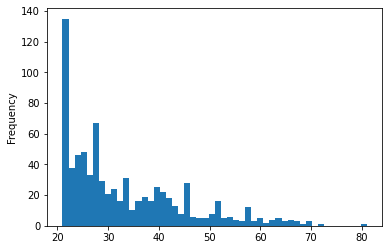

In [14]:
df['Age'].plot(kind = 'hist', bins = 50)

<hr>
<b style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Hacer Queries</b>

In [16]:
qry = 'SELECT top 10 PatientID, Age FROM rb255002.taller_pima_patient_features;'

df_sql = pd.read_sql(qry, engine)

df_sql

,PatientId,Age
0,750,22
1,219,41
2,609,23
3,295,28
4,178,47
5,359,29
6,765,30
7,301,25
8,766,47
9,452,25


In [71]:
tdf_joined_data

l__PatientId,r__PatientId,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
611,611,3,174,58,22,194,32.9,0.593,36,1
589,589,0,73,0,0,0,21.1,0.342,25,0
207,207,5,162,104,0,0,37.7,0.151,52,1
14,14,5,166,72,19,175,25.8,0.5870000000000001,51,1
669,669,9,154,78,30,100,30.9,0.16399999999999998,45,0
370,370,3,173,82,48,465,38.4,2.137,25,1
316,316,3,99,80,11,64,19.3,0.284,30,0
53,53,8,176,90,34,300,33.7,0.467,58,1
272,272,3,122,78,0,0,23.0,0.254,40,0
161,161,7,102,74,40,105,37.2,0.204,45,0


In [93]:
# extract Los Pacintes con mas de 30 añas que tienen Diabetes
Mayor30 = tdf_joined_data[(tdf_joined_data.Age > 30) & ((tdf_joined_data.NumTimesPrg==3) | (tdf_joined_data.NumTimesPrg==8)) ]                         

Mayor30

l__PatientId,r__PatientId,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
9,9,8,125,96,0,0,0.0,0.232,54,1
462,462,8,74,70,40,49,35.3,0.705,39,0
344,344,8,95,72,0,0,36.8,0.485,57,0
611,611,3,174,58,22,194,32.9,0.593,36,1
674,674,8,91,82,0,0,35.6,0.5870000000000001,68,0
754,754,8,154,78,32,0,32.4,0.443,45,1
570,570,3,78,70,0,0,32.5,0.27,39,0
188,188,8,109,76,39,114,27.9,0.64,31,1
133,133,8,84,74,31,0,38.3,0.457,39,0
140,140,3,128,78,0,0,21.1,0.268,55,0


In [94]:
# Remove redundant 'year' column - as all the rows have same value '1990'
Mayor30 = Mayor30.drop(['SkinThick','PlGlcConc'], axis = 1)
Mayor30.head()

l__PatientId,r__PatientId,NumTimesPrg,BloodP,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
21,21,8,84,0,35.4,0.388,50,0
61,61,8,72,0,32.9,0.27,39,1
111,111,8,62,495,34.0,0.5429999999999999,46,1
133,133,8,74,0,38.3,0.457,39,0
154,154,8,78,0,47.9,0.13699999999999998,43,1
175,175,8,72,130,32.7,0.7190000000000001,36,1
140,140,3,78,0,21.1,0.268,55,0
53,53,8,90,300,33.7,0.467,58,1
9,9,8,96,0,0.0,0.232,54,1
2,2,8,64,0,23.3,0.672,32,1


In [95]:
df = Mayor30.to_pandas(all_rows = True)

<AxesSubplot:ylabel='Frequency'>

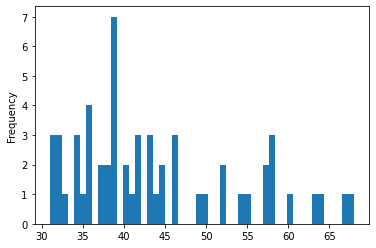

In [96]:
df['Age'].plot(kind = 'hist', bins = 50)

In [ ]:
# Ordenar

In [137]:
Mayor30 = Mayor30.sort(columns=['HasDiabetes', 'Age'], ascending=[True, False])
Mayor30

l__PatientId,r__PatientId,NumTimesPrg,BloodP,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
674,674,8,82,0,35.6,0.5870000000000001,68,0
489,489,8,80,0,26.1,0.551,67,0
509,509,8,78,0,25.0,0.409,64,0
263,263,3,80,0,32.4,0.2,63,0
299,299,8,72,0,23.6,0.84,58,0
557,557,8,76,0,27.8,0.237,58,0
344,344,8,72,0,36.8,0.485,57,0
140,140,3,78,0,21.1,0.268,55,0
21,21,8,84,0,35.4,0.388,50,0
345,345,8,88,108,38.5,0.349,49,0


In [139]:
#Contar 
count_Mayor30=Mayor30.groupby(['HasDiabetes','Age']).count().select(['HasDiabetes','Age','count_l__PatientId'])
count_Mayor30 = count_Mayor30.assign(Cantidad = count_Mayor30.count_l__PatientId)
count_Mayor30 = count_Mayor30.drop(['count_l__PatientId'], axis=1)
count_Mayor30

HasDiabetes,Age,Cantidad
0,38,1
1,39,2
1,46,1
1,35,1
0,42,3
1,45,2
0,64,1
1,57,1
1,43,3
0,57,1


In [140]:
copy_to_sql(df = count_Mayor30, table_name = "TienenDiabetes30", primary_index="Age", if_exists="replace")

In [144]:
test_set = DataFrame.from_query("""
SELECT top 5
   * from TienenDiabetes30 order by Age desc
""").to_pandas()
test_set

,HasDiabetes,Age,Cantidad
0,0,68,1
1,0,67,1
2,0,64,1
3,0,63,1
4,1,60,1


<h3>Lista de Funciones Analiticas</h3>

In [18]:
help("teradataml")

Help on package teradataml:

NAME
    teradataml

PACKAGE CONTENTS
    _version
    analytics (package)
    catalog (package)
    common (package)
    config (package)
    context (package)
    data (package)
    dataframe (package)
    dbutils (package)
    lib (package)
    options (package)
    series (package)
    table_operators (package)
    utils (package)

SUBMODULES
    constants
    exceptions
    formula
    messagecodes
    messages
    tdmlctx
    tdmldf
    v

DATA
    col_types_dict = {}
    config_folder = '/home/jovyan/.local/lib/python3.7/site-packages/terad...
    configure = <teradataml.options.configure._Configure object>
    curr_dir = '/home/jovyan/.local/lib/python3.7/site-packages/teradataml...
    display = <teradataml.options.display._Display object>
    func = <sqlalchemy.sql.functions._FunctionGenerator object>
    function_alias_mappings = {}
    json_data = {}
    python_packages_installed = False
    td_connection = None
    td_sqlalchemy_engine = None
 

In [ ]:
#pip install teradataml==17.0.0.4 aoa==6.1.0 pandas==1.1.5